In [68]:
'''
linear_regression.ipynb

This program aims to pick random points, draw error bars, fits a linear model and using Bayesian inference will
define a likliehood function , implement the metropolis algorithm and produce a graph that has the 95% credible 
band for both the model and Y parameter.

precondition:
postcondition:
'''

'\nlinear_regression.ipynb\n\nThis program aims to pick random points, draw error bars, fits a linear model and using Bayesian inference will\ndefine a likliehood function , implement the metropolis algorithm and produce a graph that has the 95% credible \nband for both the model and Y parameter.\n\nprecondition:\npostcondition:\n'

In [69]:
# importing necessary packages
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import corner # makes corner plots, explore later

In [70]:
# defining a linear function to generate values
def true_function_A(x):
    return 3*x + 2

In [77]:
def add_gaussian_noise(x, alpha):
    mu_x = true_function_A(x) # in a normal distribution mu is centered as 0
    cov_alpha = np.diag(alpha)**2 # extracts the covariance diagonal with size len x len, question: can you square matricies?
    return np.random.multivariate_normal(mu_x,cov_alpha) #adds gaussian noise that we will fix later

In [78]:
np.random.seed(179) # using a seed to produce reproducible results
data_A_x = np.array([0.5, 0.6, 0.7, 0.75, 0.8, 0.9, 1.1, 1.2, 1.5, 1.7, 2.0])
data_A_errors = np.array([0.3, 0.3, 0.6, 0.3, 0.3, 0.6, 0.6, 0.3, 0.3, 0.6, 1]) #question: does any matrix we create be positive definite or should there be a check step by doing a cholsky decomposition?
length = len(data_A_errors)
data_A_y = add_gaussian_noise(data_A_x, data_A_errors)

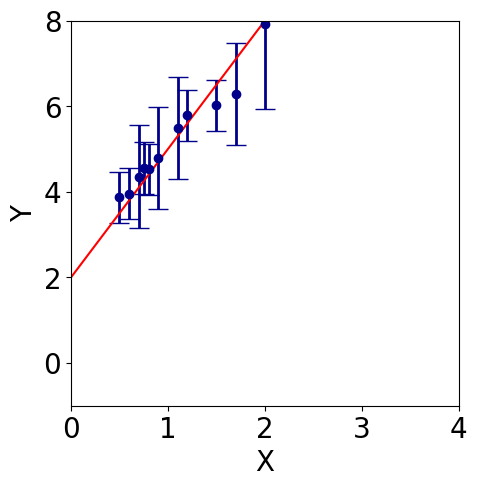

In [ ]:
### yay! time to graph (need to go through matplotlib later)
# Plot the data with error bars
fig, ax = plt.subplots(figsize=(5,5),dpi=100)
ax.errorbar(data_A_x, data_A_y, yerr=2*data_A_errors, fmt='o', linewidth=2,capsize=7,label='Data [95% Errors]',color="darkblue")

x_func = np.linspace(0, 2.5, 100)

#If you want to see the true function that generated these, uncomment the following line
ax.plot(x_func, true_function_A(x_func), label='True Function', color= "red")

# plt.legend(fontsize=15,frameon=True, edgecolor='black')

# Set the axis labels and title
ax.set_xlabel('X',fontsize=20)
ax.set_ylabel('Y',fontsize=20)
# ax.set_title('Data with Error Bars')

plt.xlim(0,4)
plt.ylim(-1,8)

plt.rc('xtick', labelsize=20)    # fontsize of the tick labels
plt.rc('ytick', labelsize=20)
plt.show()